<a href="https://colab.research.google.com/github/athospugliesedev/python_codes/blob/main/nttenergia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandasai==1.4.7
!pip install pandas
from google.colab import drive
drive.mount('/content/drive/')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.0/168.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 49.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.4/808.4 kB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 63.7 MB/s eta 0:00:00
  Attempting uninstall: duckdb
    Found existing installation: duckdb 0.9.1
    Uninstalling duckdb-0.9.1:
      Successfully uninstalled duckdb-0.9.1
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.23
    Uninstalling SQLAlchemy-2.0.23:
      Successfully uninstalled SQLAlchemy-2.0.23
  Attempting uninstall: ipython
    Found existing installation: ipython 7.34.0
    Uninstalling ipython-7.34.0:
      Successfully uninstalled ipython-7.34.0
ERROR: pip's dependency resolver 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import pandasai
import pandas as pd
from pandasai.llm import AzureOpenAI
from pandasai.llm import OpenAI
from pandasai import SmartDataframe
import openai

llm = AzureOpenAI(
    api_version="2023-05-15",
    deployment_name="gpt-35-turbo",
    api_token="",
    api_base="",
    is_chat_model=True
)

df = pd.read_csv("/content/drive/MyDrive/reclamacoes-n1e2-distribuidoras.csv", sep=";", dtype='unicode', encoding='latin-1')

# Print column names to identify the correct column
print(df.columns)
mean_value = df.mean(numeric_only=True, skipna=True)

sdf = SmartDataframe(df, config={
    "llm": llm,
    "enable_cache": False,
    "verbose": True,
})


Index(['DatGeracaoConjuntoDados', 'DatReferencia', 'SigAgente', 'NumCPFCNPJ',
       'CodMunicipio', 'NomMunicipio', 'SigUF', 'SigRegiao',
       'NomClassificacaoAgente', 'CodTipoReclamacao', 'NomCanalReclamacao',
       'DescReclamacao', 'QtdReclamacoesRecebidas',
       'QtdReclamacoesImprocedentes', 'QtdReclamacoesProcedentes',
       'NumPrazoMedioSolucao', 'CodFormaContato', 'DscFormaContato',
       'NumCtaPrazoMedioSolucaoImproc', 'NumOuvPrazoMedioSolucaoImproc'],
      dtype='object')


In [ ]:
import pandasai
import pandas as pd
from pandasai.llm import AzureOpenAI
from pandasai.llm import OpenAI
from pandasai import SmartDataframe
import openai

llm = AzureOpenAI(
    api_version="2023-05-15",
    deployment_name="gpt-35-turbo",
    api_token="9f21fc3ae81e4a15b3fb40524f4c837a",
    api_base="https://openai-portodigital.openai.azure.com/",
    is_chat_model=True
)

df = pd.read_csv("/content/drive/MyDrive/reclamacoes-n1e2-distribuidoras.csv", sep=";", dtype='unicode', encoding='latin-1')

colunas_desejadas = [
    'DatGeracaoConjuntoDados', 'DatReferencia', 'SigAgente', 'NumCPFCNPJ',
    'CodMunicipio', 'NomMunicipio', 'SigUF', 'SigRegiao',
    'NomClassificacaoAgente', 'CodTipoReclamacao', 'NomCanalReclamacao',
    'DescReclamacao', 'QtdReclamacoesRecebidas',
    'QtdReclamacoesImprocedentes', 'QtdReclamacoesProcedentes',
    'NumPrazoMedioSolucao', 'CodFormaContato', 'DscFormaContato',
    'NumCtaPrazoMedioSolucaoImproc', 'NumOuvPrazoMedioSolucaoImproc'
]

novo_df = df[colunas_desejadas].copy()

print(novo_df.columns)

sdf_novo = SmartDataframe(novo_df, config={
    "llm": llm,
    "enable_cache": False,
    "verbose": True,
})


Index(['DatGeracaoConjuntoDados', 'DatReferencia', 'SigAgente', 'NumCPFCNPJ',
       'CodMunicipio', 'NomMunicipio', 'SigUF', 'SigRegiao',
       'NomClassificacaoAgente', 'CodTipoReclamacao', 'NomCanalReclamacao',
       'DescReclamacao', 'QtdReclamacoesRecebidas',
       'QtdReclamacoesImprocedentes', 'QtdReclamacoesProcedentes',
       'NumPrazoMedioSolucao', 'CodFormaContato', 'DscFormaContato',
       'NumCtaPrazoMedioSolucaoImproc', 'NumOuvPrazoMedioSolucaoImproc'],
      dtype='object')


In [ ]:
prompt = "Which SigAgente has more QtdReclamacoesRecebida but QtdReclamacoesProcedentes?"
response = sdf_novo.chat(prompt)
print(response)

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/ops/array_ops.py", line 165, in _na_arithmetic_op
    result = func(left, right)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py", line 241, in evaluate
    return _evaluate(op, op_str, a, b)  # type: ignore[misc]
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py", line 129, in _evaluate_numexpr
    result = _evaluate_standard(op, op_str, a, b)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py", line 70, in _evaluate_standard
    return op(a, b)
TypeError: unsupported operand type(s) for -: 'str' and 'str'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._cod

Unfortunately, I was not able to answer your question, because of the following error:

unsupported operand type(s) for -: 'float' and 'str'



<string>:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


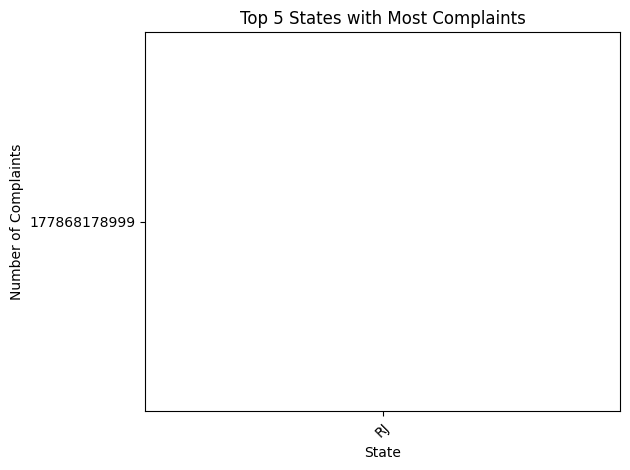

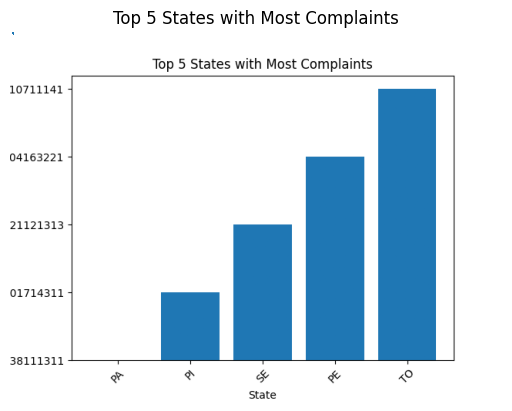

None


In [ ]:
prompt = "Made a histogram of the question, What are the five states with the most complaints? Search in SigUF and QtdReclamacoesRecebidas for the answer, only on these columns."

prompt += f" The relevant columns are: SigUF and QtdReclamacoesRecebidas. {novo_df['SigUF'].nunique()} unique states and {novo_df['QtdReclamacoesRecebidas'].nunique()} unique complaint counts."

response = sdf_novo.chat(prompt)
print(response)


<string>:28: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.


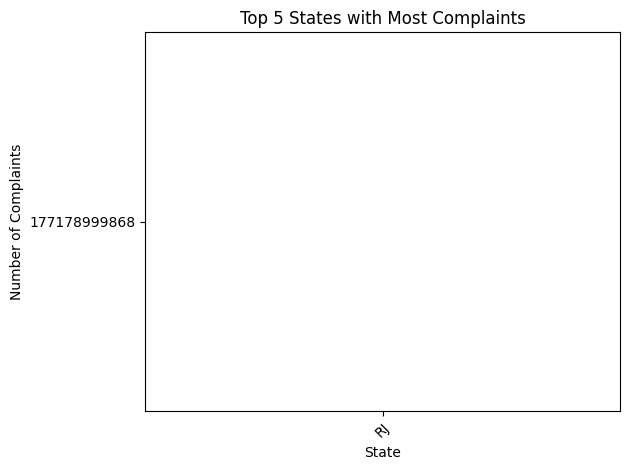

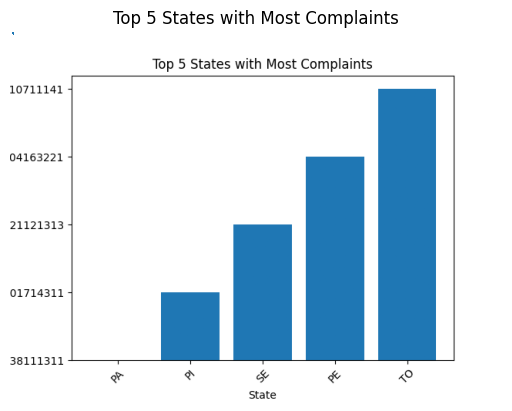

None


In [ ]:

response = sdf.chat("Made a histogram of the question, What are the five states with the most complaints? Search in SigUf and QtdReclamacoesRecebida for answer the question, only on these column.")
print(response)

In [ ]:

# Ask questions for each column
for column in df.columns:
    response = sdf.chat(f"Made a histogram of the question, What are the five states with the most complaints? Search in SigUf and QtdReclamacoesRecebida for answer the question, only on these column. ")
    print(f"Answer: {response}")

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._code_manager.execute_code(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 286, in execute_code
    return analyze_data(self._get_originals(dfs))
  File "<string>", line 24, in analyze_data
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 448, in astype
    return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", 

Answer: Unfortunately, I was not able to answer your question, because of the following error:

No code found in the response



ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._code_manager.execute_code(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 286, in execute_code
    return analyze_data(self._get_originals(dfs))
  File "<string>", line 24, in analyze_data
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 448, in astype
    return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", 

Answer: Unfortunately, I was not able to answer your question, because of the following error:

No code found in the response



ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._code_manager.execute_code(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 286, in execute_code
    return analyze_data(self._get_originals(dfs))
  File "<string>", line 24, in analyze_data
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 448, in astype
    return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", 

Answer: Unfortunately, I was not able to answer your question, because of the following error:

No code found in the response



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._code_manager.execute_code(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 286, in execute_code
    return analyze_data(self._get_originals(dfs))
  File "<string>", line 24, in analyze_data
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/

Answer: Unfortunately, I was not able to answer your question, because of the following error:

No code found in the response



ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._code_manager.execute_code(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 286, in execute_code
    return analyze_data(self._get_originals(dfs))
  File "<string>", line 24, in analyze_data
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 448, in astype
    return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", 

Answer: Unfortunately, I was not able to answer your question, because of the following error:

No code found in the response



ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._code_manager.execute_code(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 286, in execute_code
    return analyze_data(self._get_originals(dfs))
  File "<string>", line 25, in analyze_data
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 448, in astype
    return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", 

Answer: Unfortunately, I was not able to answer your question, because of the following error:

Exceeds the limit (4300) for integer string conversion: value has 46512 digits; use sys.set_int_max_str_digits() to increase the limit



ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._code_manager.execute_code(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 286, in execute_code
    return analyze_data(self._get_originals(dfs))
  File "<string>", line 24, in analyze_data
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 448, in astype
    return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", 

Answer: Unfortunately, I was not able to answer your question, because of the following error:

No code found in the response



ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._code_manager.execute_code(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 286, in execute_code
    return analyze_data(self._get_originals(dfs))
  File "<string>", line 24, in analyze_data
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 448, in astype
    return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", 

Answer: Unfortunately, I was not able to answer your question, because of the following error:

No code found in the response



<string>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._code_manager.execute_code(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 286, in execute_code
    return analyze_data(self._get_originals(dfs))
  File "<string>", line 24, in analyze_data
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 448, in 

Answer: Unfortunately, I was not able to answer your question, because of the following error:

No code found in the response



ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._code_manager.execute_code(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 286, in execute_code
    return analyze_data(self._get_originals(dfs))
  File "<string>", line 24, in analyze_data
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 448, in astype
    return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", 

Answer: Unfortunately, I was not able to answer your question, because of the following error:

No code found in the response



ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._code_manager.execute_code(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 286, in execute_code
    return analyze_data(self._get_originals(dfs))
  File "<string>", line 24, in analyze_data
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 448, in astype
    return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", 

Answer: Unfortunately, I was not able to answer your question, because of the following error:

No code found in the response



ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._code_manager.execute_code(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 286, in execute_code
    return analyze_data(self._get_originals(dfs))
  File "<string>", line 24, in analyze_data
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 448, in astype
    return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", 

Answer: Unfortunately, I was not able to answer your question, because of the following error:

No code found in the response



ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._code_manager.execute_code(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 286, in execute_code
    return analyze_data(self._get_originals(dfs))
  File "<string>", line 24, in analyze_data
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 448, in astype
    return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", 

Answer: Unfortunately, I was not able to answer your question, because of the following error:

No code found in the response



ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._code_manager.execute_code(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 286, in execute_code
    return analyze_data(self._get_originals(dfs))
  File "<string>", line 24, in analyze_data
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 448, in astype
    return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", 

Answer: Unfortunately, I was not able to answer your question, because of the following error:

No code found in the response



ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._code_manager.execute_code(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 286, in execute_code
    return analyze_data(self._get_originals(dfs))
  File "<string>", line 24, in analyze_data
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 448, in astype
    return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", 

Answer: Unfortunately, I was not able to answer your question, because of the following error:

No code found in the response

Answer:           SigAgente                            QtdReclamacoesRecebidas
Rank                                                                  
1     Equatorial PA  8534076534626581651161609614940858213745141239...
2     Equatorial PI  8418000215261113820301601265800302001096239144...
3            CERCOS  8000010400002100000000060013040100034000300000...
4               EPB  7811412094544872145179010406897811616003326311...
5     CPFL-PAULISTA  7082802692381148320167547419701011143130023381...
6            EDP ES  5942298332752182038430578169151432905110321302...
7       ELETROPAULO  5522245791912615966573911637212649491567262608...
8           ELEKTRO  5456101057596231911542041871814214030854412986...
9             CELPE  5311482471199616342430513234754304633764013428...
10              ETO  5262882423591396257263304051734621111865276529...


ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._code_manager.execute_code(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 286, in execute_code
    return analyze_data(self._get_originals(dfs))
  File "<string>", line 24, in analyze_data
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 448, in astype
    return self.apply("astype", dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/managers.py", line 352, in apply
    applied = getattr(b, f)(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py", 

Answer: Unfortunately, I was not able to answer your question, because of the following error:

No code found in the response



IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

ERROR:pandasai.helpers.logger:Failed with error: Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pandasai/smart_datalake/__init__.py", line 438, in chat
    result = self._code_manager.execute_code(
  File "/usr/local/lib/python3.10/dist-packages/pandasai/helpers/code_manager.py", line 286, in execute_code
    return analyze_data(self._get_originals(dfs))
  File "<string>", line 24, in analyze_data
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/generic.py", line 6240, in astype
    new_data = self._mgr.astype(dtype=dtype, copy=copy, errors=errors)
  File "/usr/local/lib/python3.10/dist-packages/pandas/core/internals/

Answer: Unfortunately, I was not able to answer your question, because of the following error:

No code found in the response

